# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd

df = pd.read_csv('zillow_data.csv')

# Step 2: Data Preprocessing

In [2]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [3]:
df.columns = list(df.columns[:7]) + list(get_datetimes(df))

In [4]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Step 3: Reshape from Wide to Long Format

In [5]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName','SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])    
    return melted#.groupby('time').aggregate({'value':'mean'})

In [6]:
melted_df = melt_data(df) #melt_data(df[df['RegionName'] == df['RegionName'][9429]])

In [7]:
melted_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,time,value
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04-01,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04-01,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04-01,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04-01,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04-01,77300.0


In [104]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
total_df['difference'] = total_df['value'].diff()

NameError: name 'total_df' is not defined

In [37]:
df.RegionName

1001

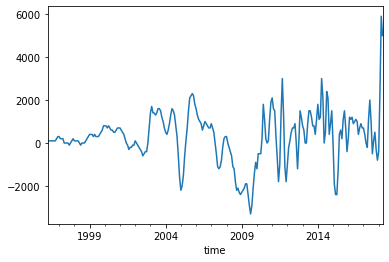

In [85]:
sns.set
total_df['difference'].plot()

In [86]:
from statsmodels.tsa.stattools import adfuller

X = total_df['difference'].values[1:]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.465928
p-value: 0.008906
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


In [87]:
total_df['difference2'] = total_df['difference'].diff()

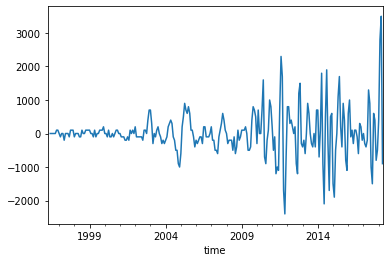

In [88]:
total_df.difference2.plot()

In [80]:
from statsmodels.tsa.stattools import adfuller

X = total_df['difference2'].values[2:]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.278629
p-value: 0.000484
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


In [92]:
from statsmodels.tsa import SARIMAX


ImportError: cannot import name 'SARIMAX' from 'statsmodels.tsa' (/Users/matt/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/statsmodels/tsa/__init__.py)

# Step 4: EDA and Visualization
Perform basic EDA as you would building any model, then create at least 3 visualizations.  At least one of the visualizations should have time on the x-axis.  Axes should be labeled and any text should be legible.

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [8]:
melted_df.set_index(['RegionName','time'], inplace=True)

In [9]:
melted_df = melted_df['value']

In [10]:
melted_df.drop(columns = ['RegionID'],inplace=True)

In [11]:
melted_df = pd.DataFrame(melted_df)

In [12]:
final_df = melted_df.unstack()

# Step 5: ARIMA Modeling
Be sure to validate your model.  Make a forecast for the future and describe the trend.

In [13]:
final_df = final_df['value']

In [14]:
df2 = final_df.transpose()

In [15]:
df2[df2.columns[1]]

time
1996-04-01    161000.0
1996-05-01    160100.0
1996-06-01    159300.0
1996-07-01    158600.0
1996-08-01    158000.0
                ...   
2017-12-01    342000.0
2018-01-01    344500.0
2018-02-01    347400.0
2018-03-01    350600.0
2018-04-01    353300.0
Name: 1002, Length: 265, dtype: float64

In [16]:
for col in df2.columns:
    df2[col] = df2[col].pct_change(periods=12)

In [17]:
df2.dropna(inplace=True)

In [18]:
df_mean = pd.DataFrame(df2.mean().sort_values(ascending=False))

In [19]:
df_mean.reset_index(inplace=True)

In [20]:
df_mean.columns = ['zipcode', 'mean']

In [21]:
df_zipcodes = df_mean[df_mean['mean'] > df_mean['mean'].quantile(.99)]

In [22]:
top_zips = list(df_zipcodes.zipcode)

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Step 6: Models
Give a detailed interpretation of results including the relationship between the inputs and output of the model.

In [24]:
frame_list = []
for code in top_zips:
    df = melted_df.loc[code]
    df = pd.DataFrame(df['value'])
    df.columns = [code]
    frame_list.append(df)

In [25]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

In [ ]:
mod = sm.tsa.statespace.SARIMAX(df.value,
                                            order=(1,2,2),
                                            seasonal_order=(2,2,2,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

output = mod.fit()

In [106]:
from tqdm import tqdm

model_list = []
for df in tqdm(frame_list[0:10]):
    try:
        mod = sm.tsa.statespace.SARIMAX(df,
                                                order=(1,1,1),
                                                seasonal_order=(1,1,1,12),
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                exog = None)

        output = mod.fit()
        model_list.append(output)
    except:
        continue
    

100%|██████████| 10/10 [00:12<00:00,  1.60s/it]


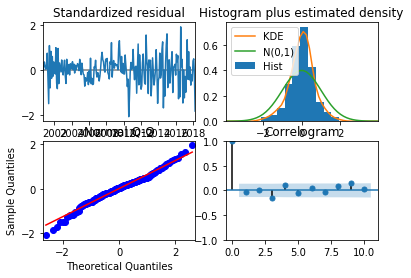

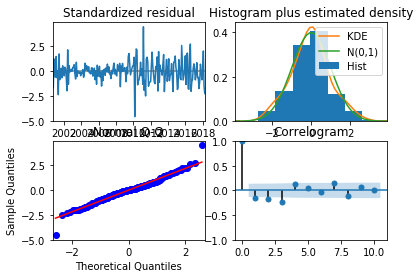

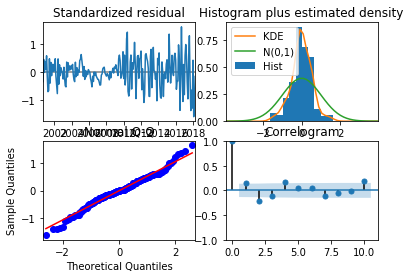

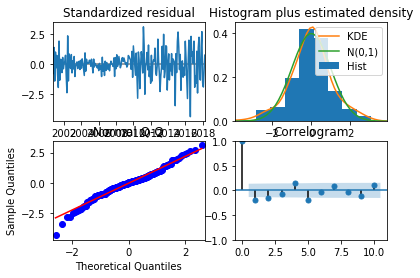

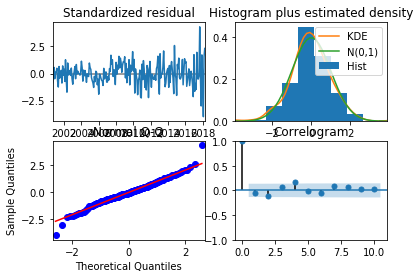

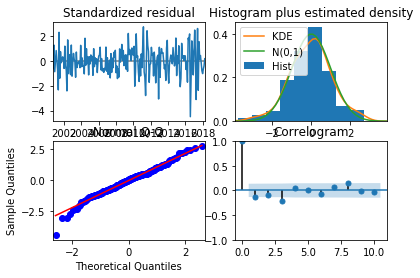

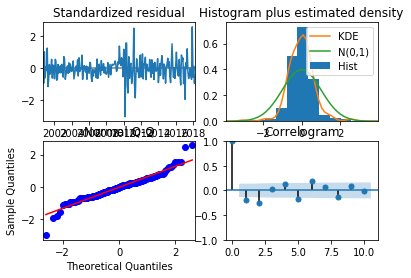

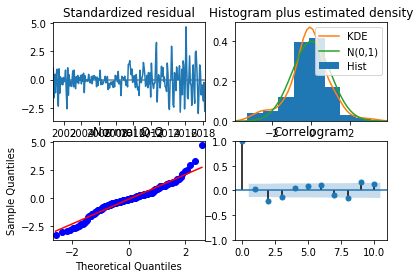

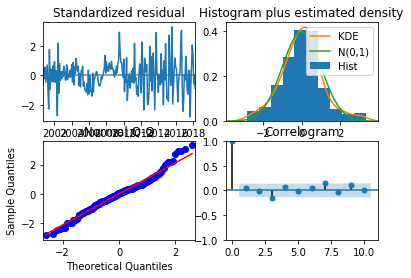

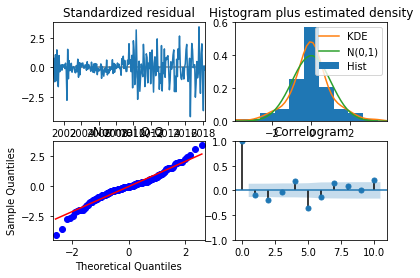

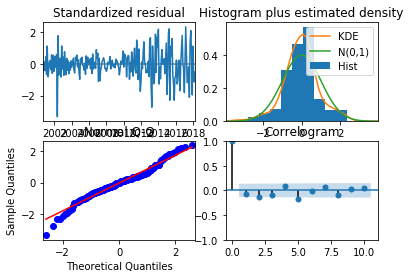

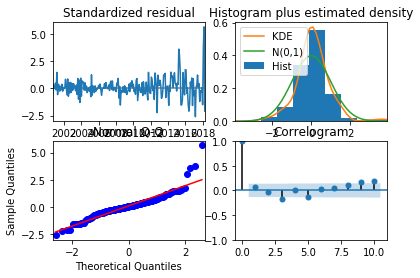

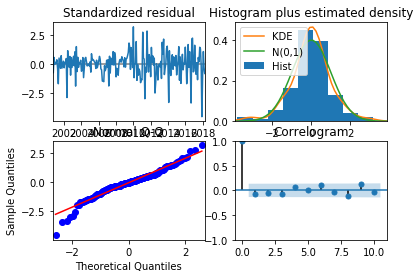

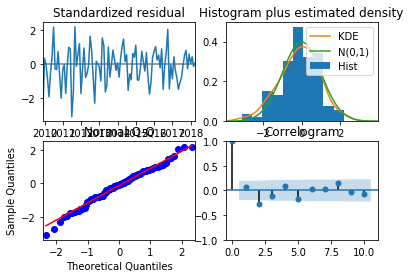

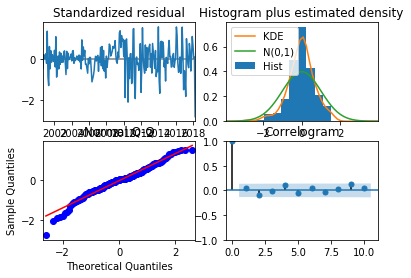

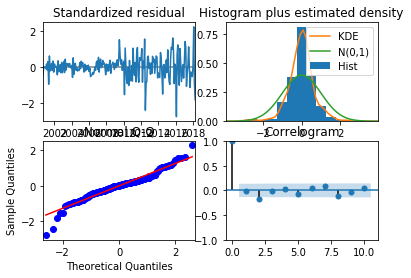

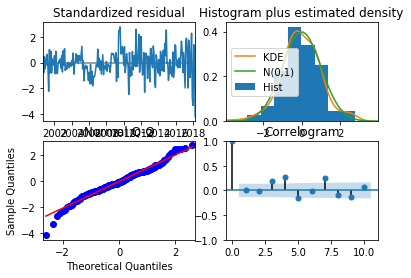

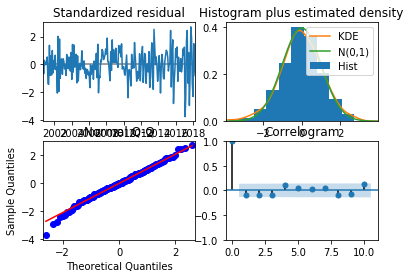

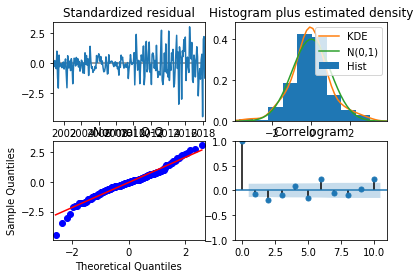

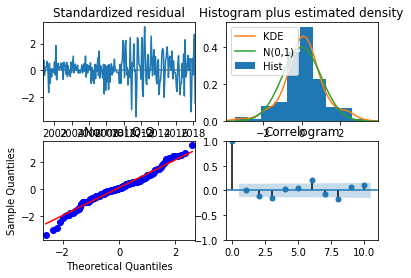

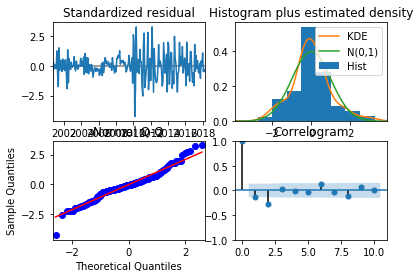

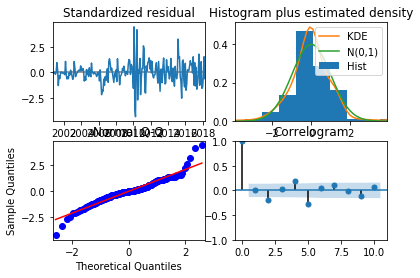

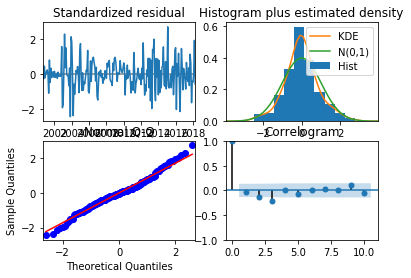

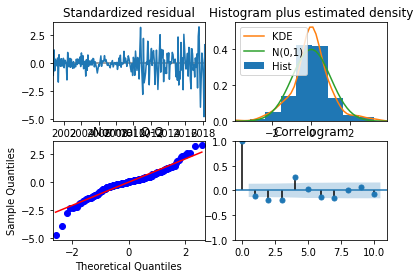

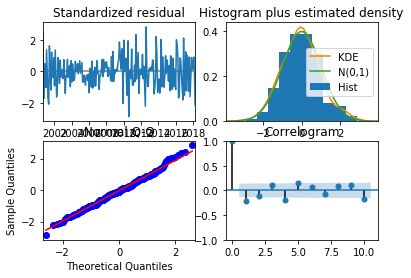

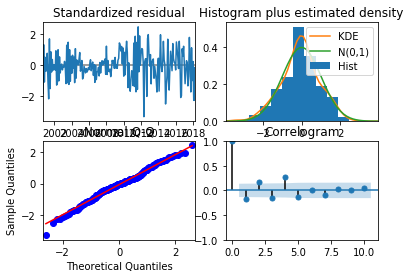

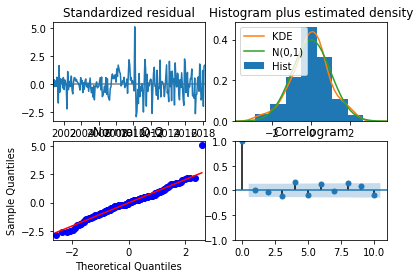

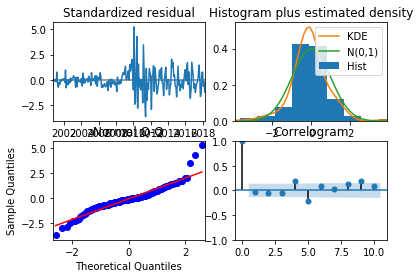

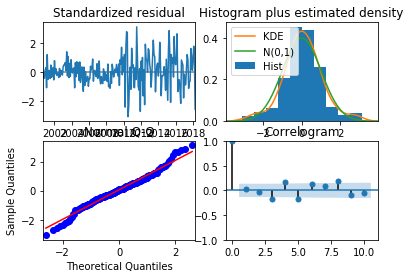

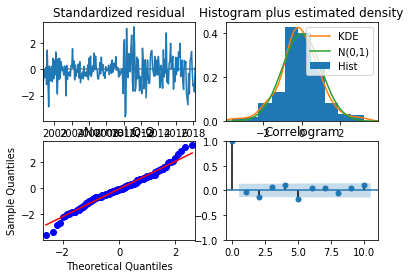

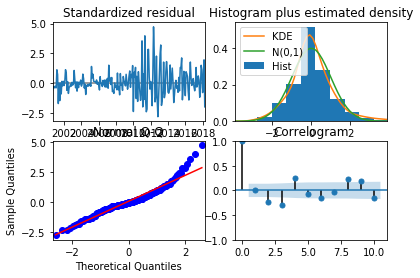

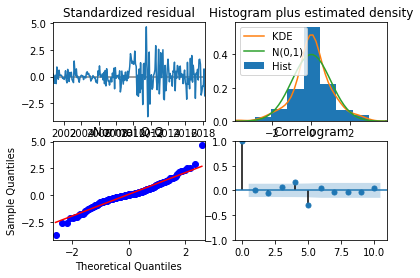

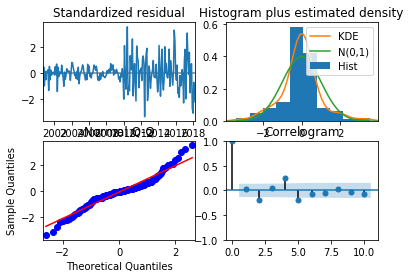

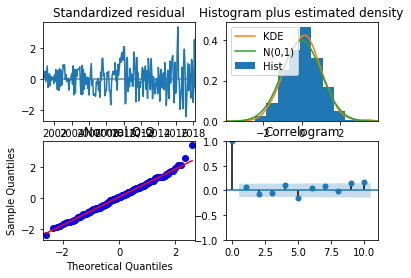

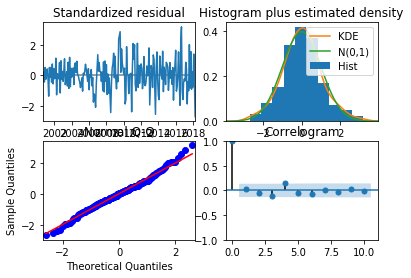

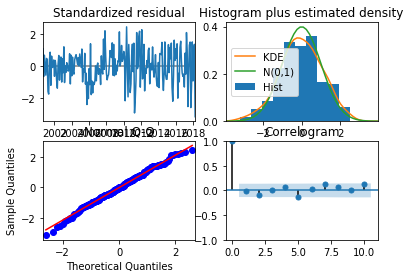

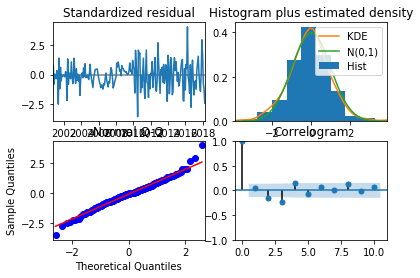

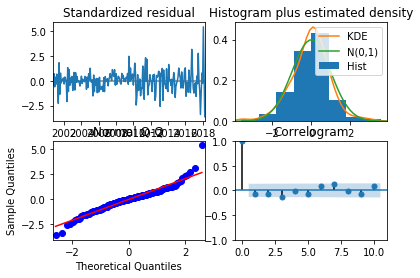

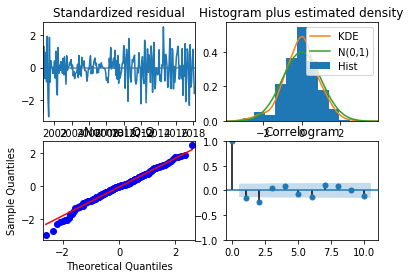

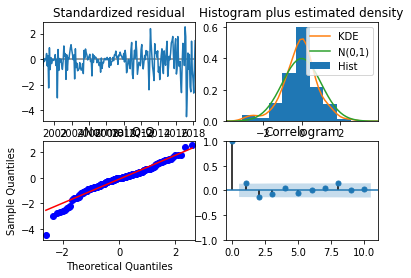

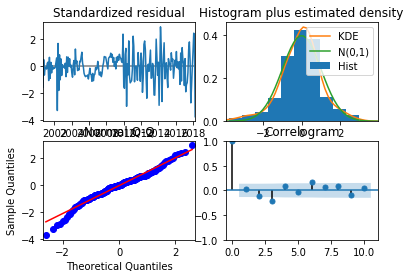

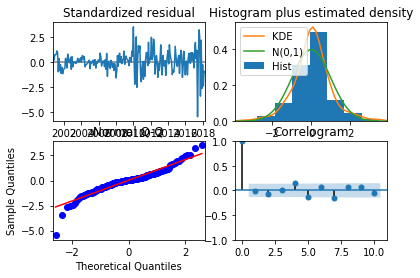

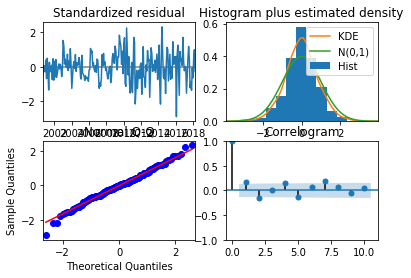

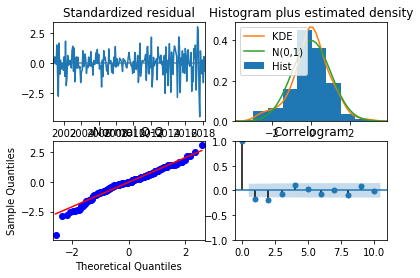

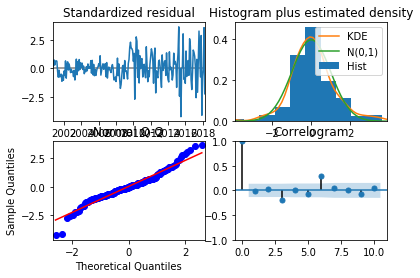

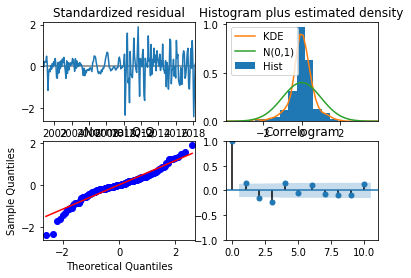

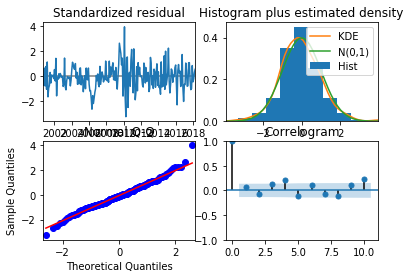

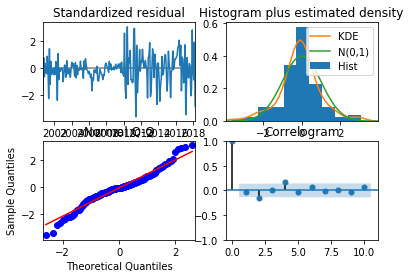

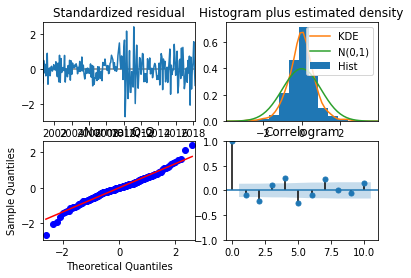

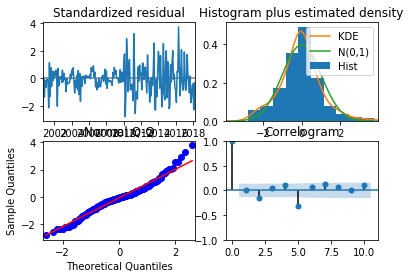

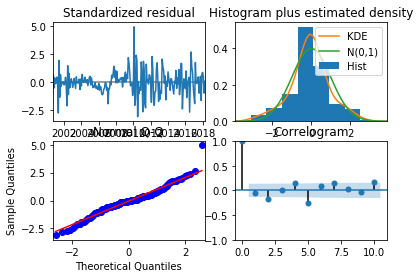

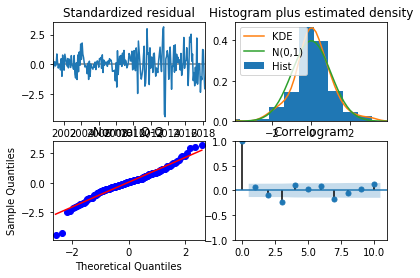

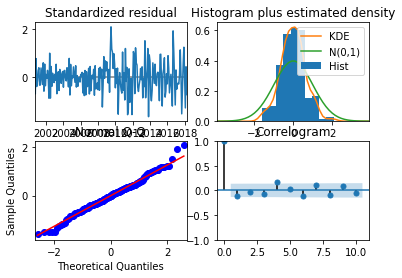

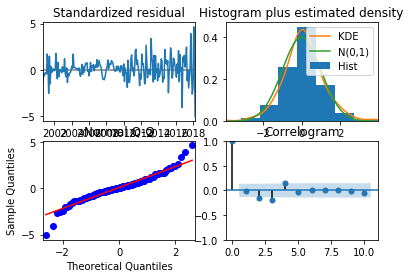

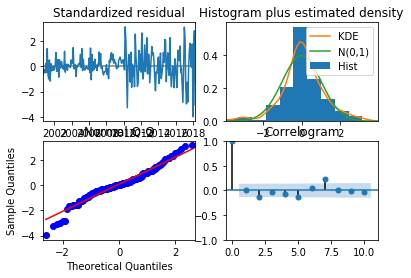

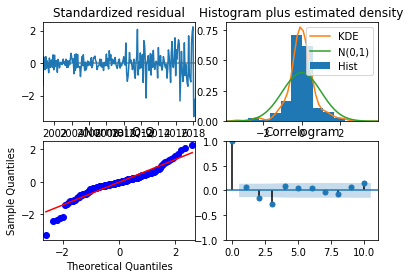

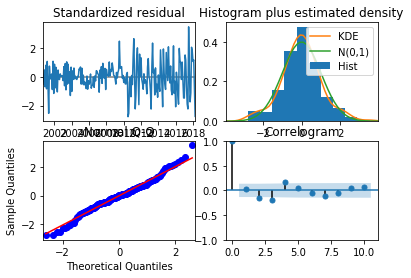

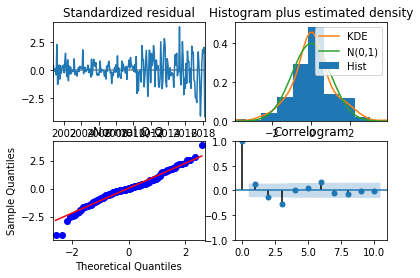

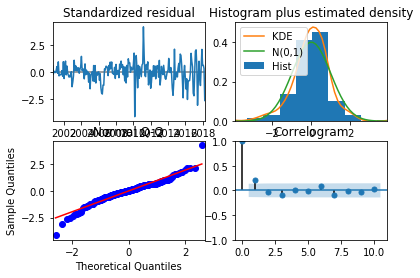

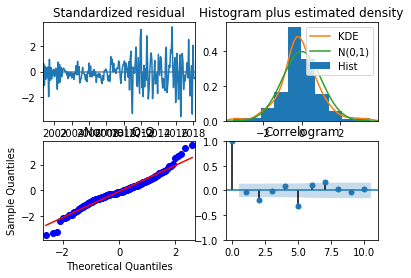

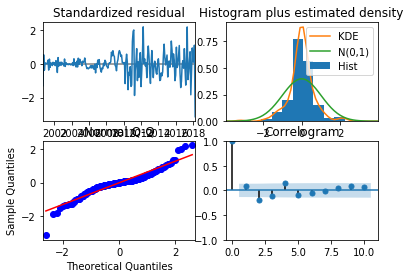

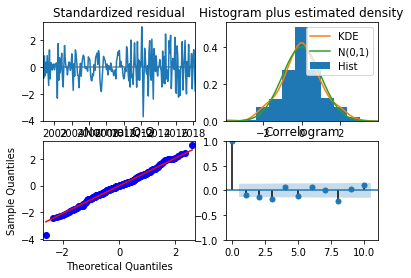

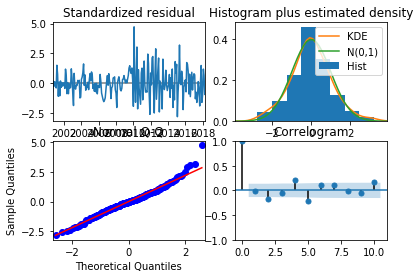

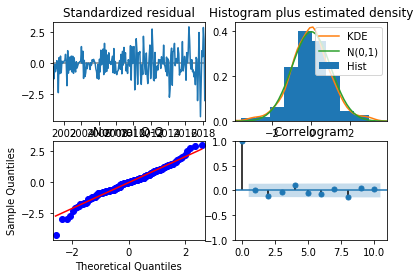

Error in callback <function flush_figures at 0x114d22bf8> (for post_execute):


KeyboardInterrupt: 

In [29]:
predictions = []

for output in model_list:
    output.plot_diagnostics()

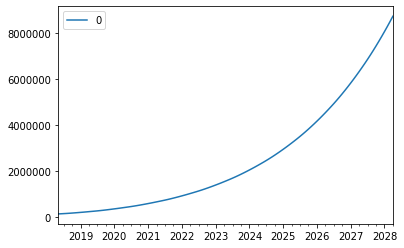

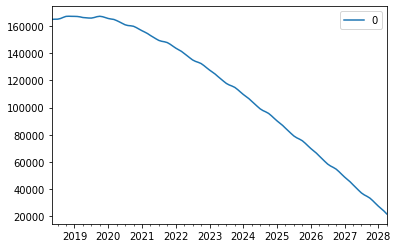

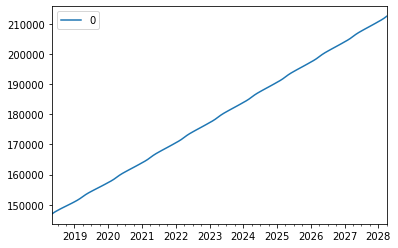

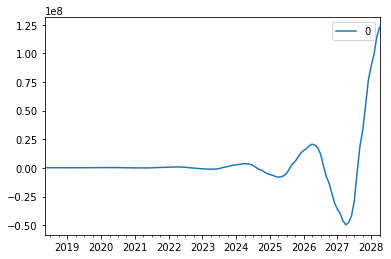

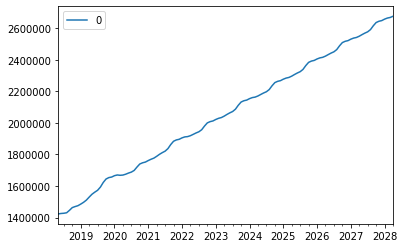

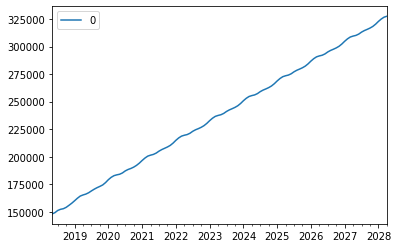

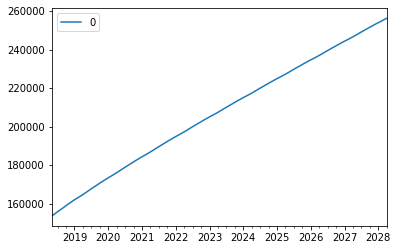

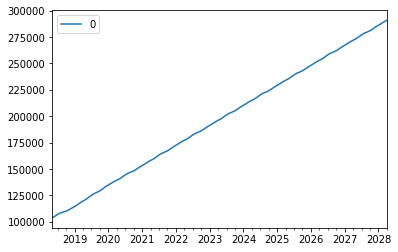

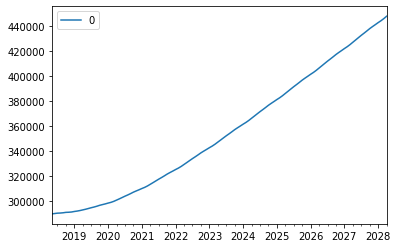

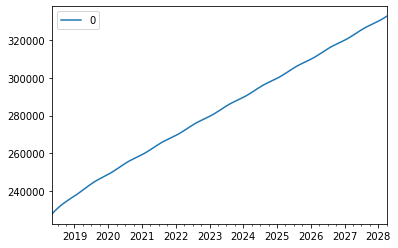

In [107]:
predictions = []

for output in model_list:
    df = pd.DataFrame(output.forecast(steps=120))#start='2018-05-01', end='2023-05-01')
    df.plot()

In [108]:
top_zips[3]

30032